<h2>Exercise 1.1</h2>

In [13]:
# Import necessary libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

!pip install opencv-python


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# Load dataset
df=pd.read_csv('runtimes.csv',comment='#')
print(df.head())

          algo     size        time1       time2       time3       time4  \
0  distributed     4096     3.736606    2.133074    1.673441    1.515788   
1  distributed    16384    14.792794    7.894031    5.681171    4.597697   
2  distributed    65536    59.123347   30.762486   21.436608   16.510129   
3  distributed   262144   240.747448  124.448679   85.384094   64.732369   
4  distributed  1048576  1097.788352  567.038172  383.563617  290.182877   

        time5  
0    1.475265  
1    3.988286  
2   13.637740  
3   53.544233  
4  242.494498  


In [15]:
# Create a mapping for renaming columns for the number of threads. This dictionary's keys are old names and values are new names
thread_col_names = {f'time{i}': f'Thread_{i}' for i in range(1,6)}  

# Using pandas' melt function to reshape the DataFrame from wide to long format. 
df_melt = pd.melt(df, id_vars=['algo', 'size'], value_vars=['time1', 'time2', 'time3', 'time4', 'time5'], 
                  var_name='Thread', value_name='Runtime').dropna()

# Now we replace the old column names (Thread) with the new column names defined in thread_col_names using .replace method
df_melt['Thread'] = df_melt['Thread'].replace(thread_col_names)

# Using the pandas' .astype() method to set the appropriate data type to each column.
# We set the 'algo' and 'Thread' columns as strings (object), the 'size' column as integer and the 'Runtime' column as float.
df_melt = df_melt.astype({"algo": str, "size": int, "Thread": str, "Runtime": float})

# Print out the first 5 rows of the reshaped DataFrame using .head() method. This helps us verify the transformations.
df_melt.head()

,algo,size,Thread,Runtime
0,distributed,4096,Thread_1,3.736606
1,distributed,16384,Thread_1,14.792794
2,distributed,65536,Thread_1,59.123347
3,distributed,262144,Thread_1,240.747448
4,distributed,1048576,Thread_1,1097.788352


<h2>Exercise 1.2</h2>

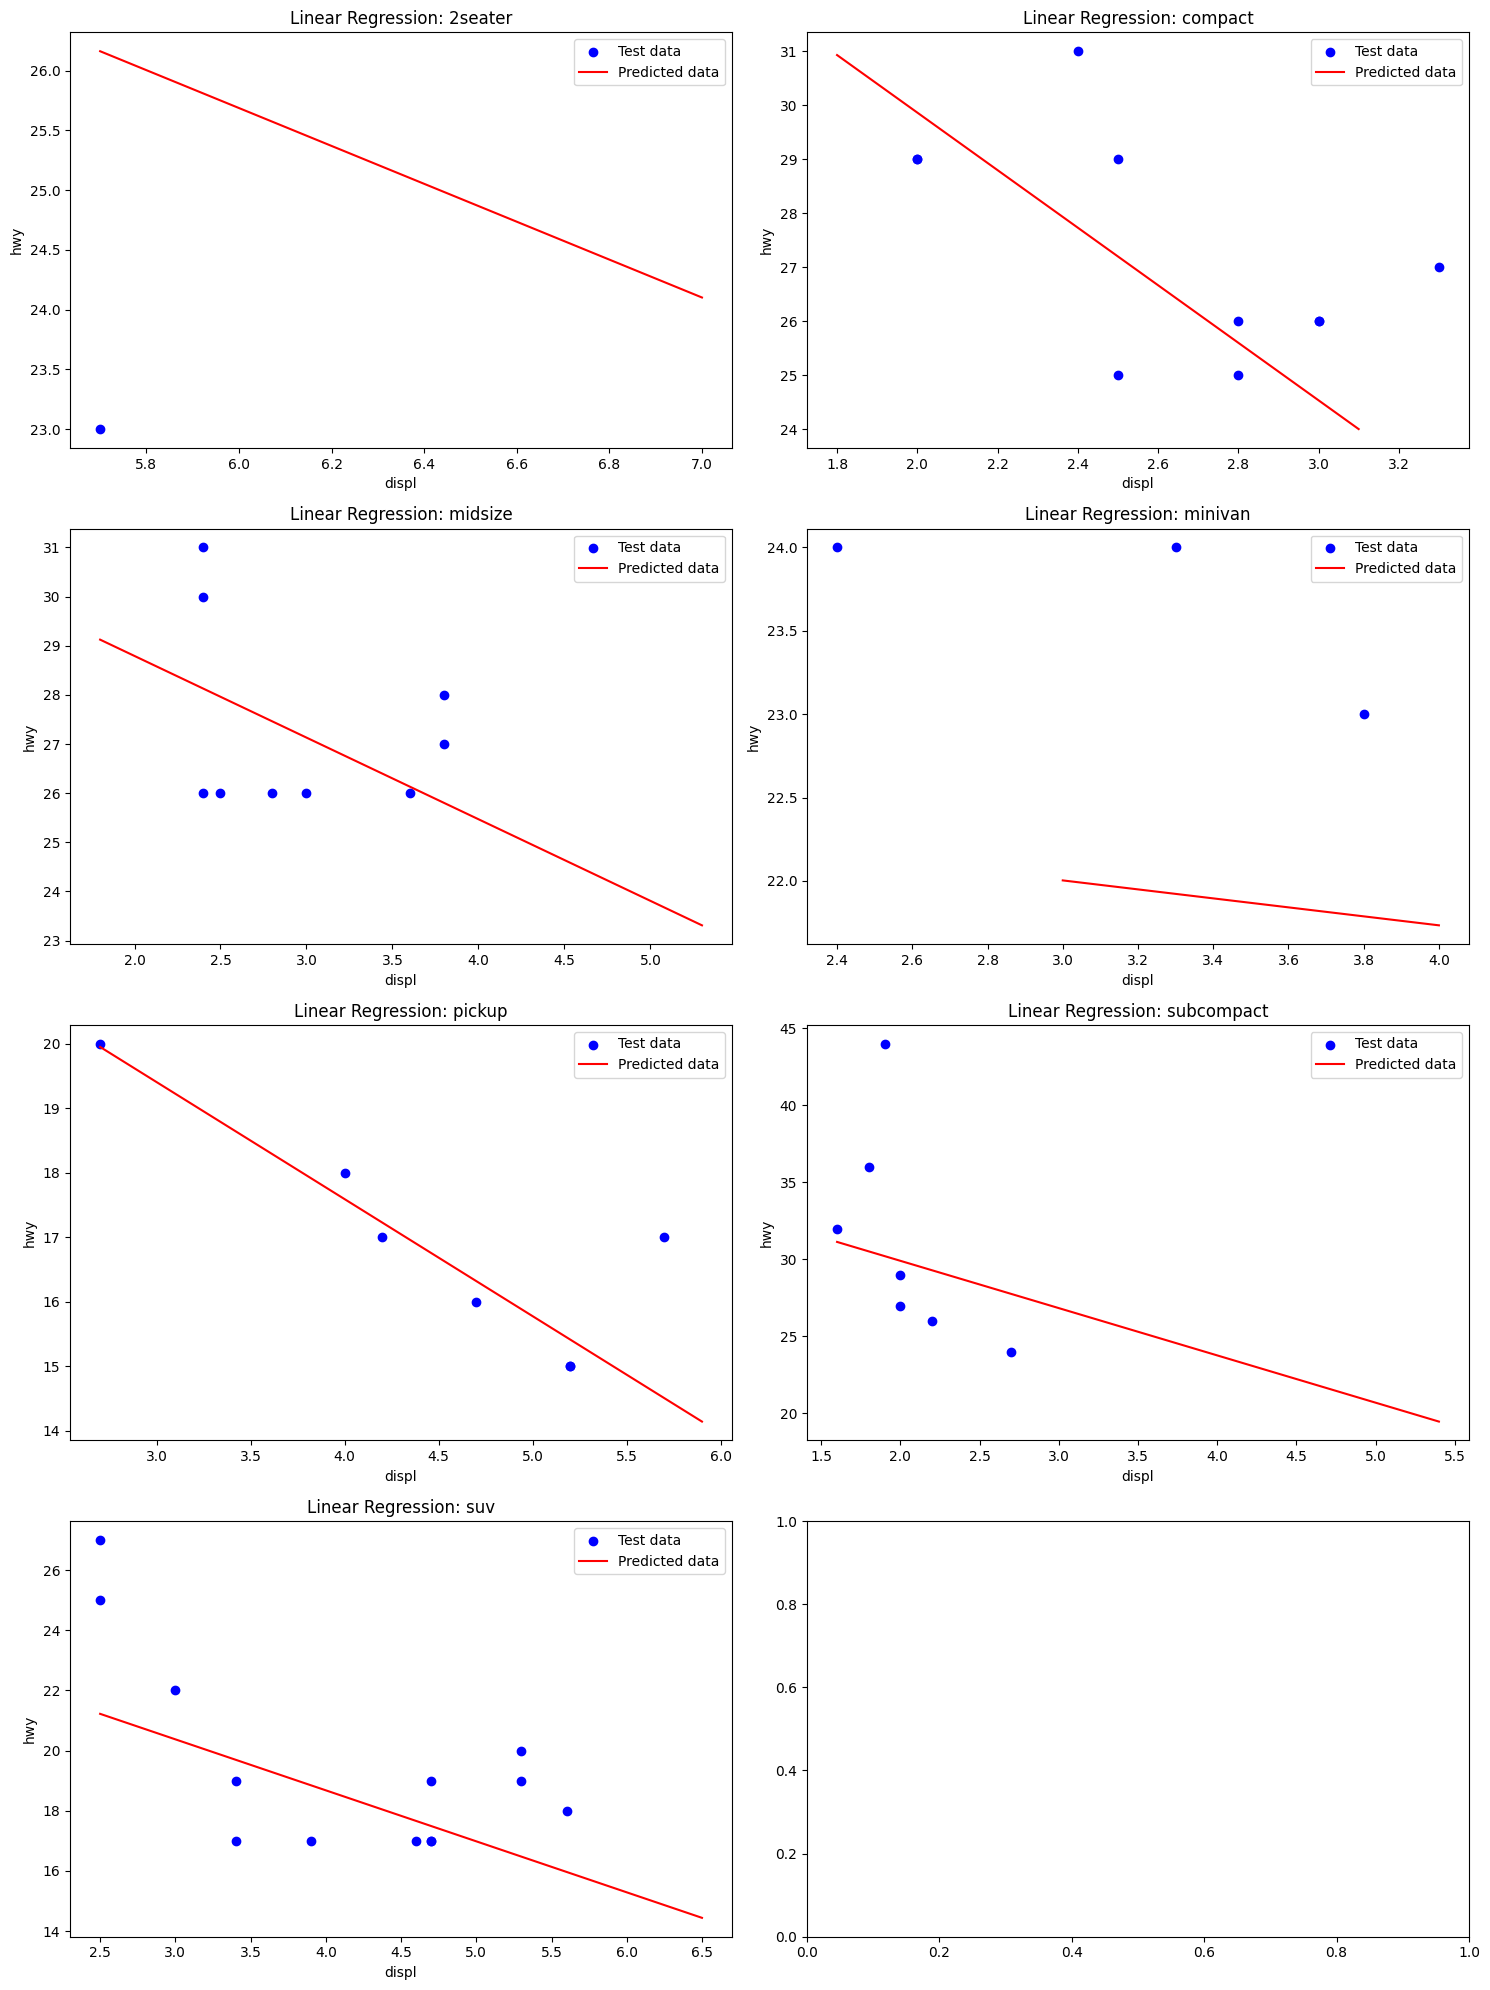

In [16]:
# Read in the .csv file using pandas
df = pd.read_csv("mpg-data.csv")

# Display the data types of each column
dtypes = df.dtypes

# Group the DataFrame by the 'class' column
split_dataset = dict(tuple(df.groupby('class')))

# Get the number of unique classes
num_classes = len(split_dataset)
# Gauge the number of rows needed for the plot grid
num_rows = math.ceil(num_classes /2)

# Initialize multiple subplots in a grid, based on the number of classes
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

axs = axs.flatten()

# For each class, fit a linear regression model on the city mileage 
# and 'displacement' (measured in litres) and plot it
for i, (car_class, data) in enumerate(split_dataset.items()):
    X = data[['displ']]
    y = data['hwy']
    
    # Split the data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Plotting the training data and the model's predictions
    axs[i].scatter(X_test, y_test, color='blue', label='Test data')
    axs[i].plot(X_train.sort_values('displ'), model.predict(X_train.sort_values('displ')), color='red', label='Predicted data')
    axs[i].set_title(f"Linear Regression: {car_class}")
    axs[i].set_xlabel('displ')
    axs[i].set_ylabel('hwy')
    axs[i].legend()
    
# Adjust the subplot layout
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
# Group the 'df' DataFrame by 'class' and 'year', and compute the median highway mileage
grouped_dataset = df.groupby(['class', 'year'])['hwy'].median().reset_index()

print(grouped_dataset)

         class  year   hwy
0      2seater  1999  24.5
1      2seater  2008  25.0
2      compact  1999  26.0
3      compact  2008  29.0
4      midsize  1999  26.0
5      midsize  2008  28.0
6      minivan  1999  22.0
7      minivan  2008  23.0
8       pickup  1999  17.0
9       pickup  2008  17.0
10  subcompact  1999  26.0
11  subcompact  2008  26.5
12         suv  1999  17.0
13         suv  2008  18.0


<h2>Exercise 1.3</h2>

(-0.5, 4271.5, 2847.5, -0.5)

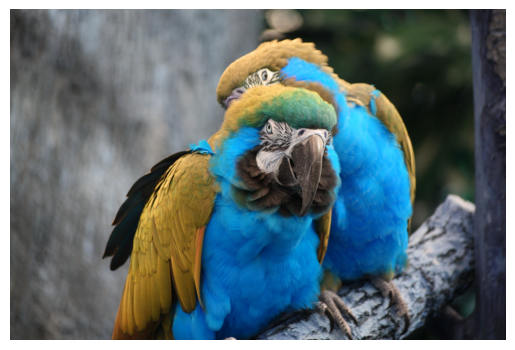

In [18]:
# Read the image
pic = cv.imread('Parrot.jpg')

# Display the original image
plt.imshow(pic)
plt.axis('off')  # Hide axis

In [19]:
def rotate_hue(image, angle):
    '''
    Function to rotate the hue of an image
    ---
    Parameters:
    image: Input image in BGR format
    angle: Angle to rotate the hue channel by (in radians). It's converted to degrees within the function
    ---
    Returns: Image with hue channel rotated by desired angle and converted back to BGR format
    '''
    # Convert the BGR image to HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Extract the Hue channel
    hue_channel = hsv_image[:, :, 0]

    # Rotate the Hue channel by desired angle and ensure values are within [0,180) range
    rotated_hue = (hue_channel + angle * 180 / np.pi) % 180

    # Replace the original Hue channel with the rotated one
    hsv_image[:, :, 0] = rotated_hue.astype(np.uint8)

    # Convert the HSV image (with rotated hue channel) back to BGR format
    rotated_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2BGR)

    return rotated_image

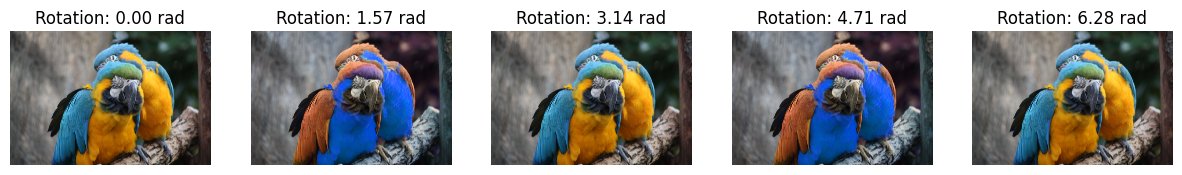

In [20]:
# Define the rotation angles
# Full rotation (2 * pi) equivalent to zero rotation included at the end
angles = [0, np.pi / 2, np.pi, 3/2 * np.pi, 2 * np.pi]

# Create a figure to plot the images
plt.figure(figsize=(15, 5))

# Apply hue rotation for each angle and plot the resulting images
for i, angle in enumerate(angles):
    # Apply hue rotation
    rotated_image = rotate_hue(pic, angle)
    
    # Plot the rotated image
    plt.subplot(1, len(angles), i + 1)  # Create a subplot for each image
    plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))  # OpenCV reads images in BGR format by default, convert it back to RGB for correct visualization
    plt.axis('off')   # Hide axes for each subplot
    plt.title(f"Rotation: {angle :.2f} rad")  # Set the angle as title

plt.show()  # Display the plotted images

<h2>Exercise 1.4</h2>

In [21]:
# 1. Create a Cartesian grid of points
x = np.linspace(-1, 1, 500) 
y = np.linspace(-2*np.pi, 2*np.pi, 500)
mesh_x, mesh_y = np.meshgrid(x, y)

# Exponential function
z = np.exp(mesh_x) * (np.cos(mesh_y) + np.sin(mesh_y) * 1j)

# Get polar coordinates
r, t = np.absolute(z), np.angle(z)

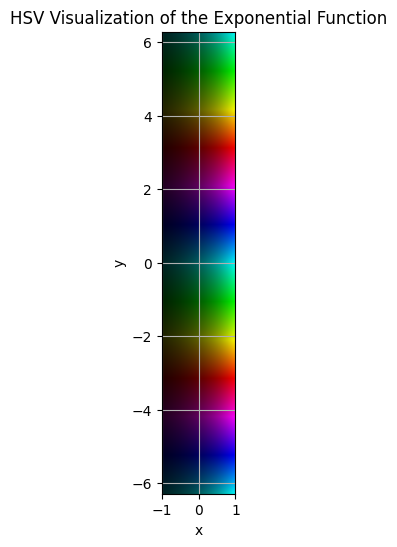

In [22]:
# 2. Create an empty array for the HSV image
HSV = np.zeros((500, 500, 3))

# Hue - use angles from polar coordinates
HSV[:,:,0] = (t + np.pi) / (2 * np.pi)

# Saturation - set to 1
HSV[:,:,1] = 1.0

# Value - rescale the magnitude to the range [0, 1]
HSV[:,:,2] = r / np.max(r)

# Convert HSV to RGB
RGB = matplotlib.colors.hsv_to_rgb(HSV)

plt.figure(figsize=(6,6))
plt.imshow(RGB, origin='lower', extent=(-1, 1, -2*np.pi, 2*np.pi))
plt.title('HSV Visualization of the Exponential Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()